In [ ]:
!gdown  --id 1fllSNYkXZkDwi3ux_7odr9I1ZQm1iXYV

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fllSNYkXZkDwi3ux_7odr9I1ZQm1iXYV
To: /content/financial_food_industry.csv
100% 218k/218k [00:00<00:00, 89.0MB/s]


#1.Dataset Quality Check

##1.1: Load the dataset.

In [ ]:
import pandas as pd
df= pd.read_csv("/content/financial_food_industry.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Revenue        2850 non-null   float64
 1   Expense        3000 non-null   float64
 2   Profit         2850 non-null   float64
 3   Region         3000 non-null   object 
 4   Employees      2850 non-null   float64
 5   Industry_Type  3000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 140.8+ KB


In [ ]:
df.describe()

,Revenue,Expense,Profit,Employees
count,2850.000000,3000.000000,2850.000000,2850.000000
mean,274.994835,191.759081,83.342964,1029.720351
std,131.451784,97.948046,53.214966,561.866322
min,50.005236,25.827213,5.539755,50.000000
25%,159.948279,107.821360,40.069490,551.250000
50%,277.353308,187.801134,71.337531,1019.000000
75%,389.856708,263.447901,117.831335,1530.000000
max,499.872953,439.890520,239.979388,1999.000000


##1.2: Check for missing values.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


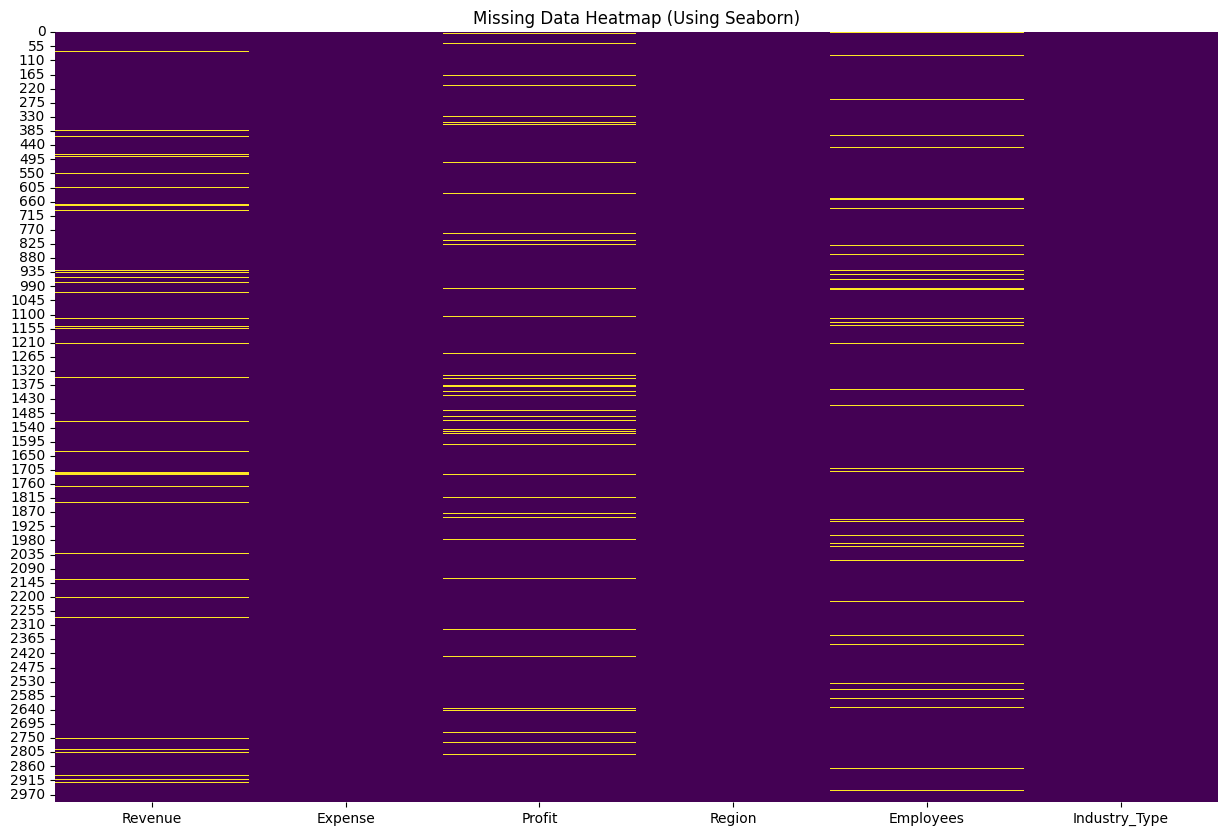

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap (Using Seaborn)")
plt.show()

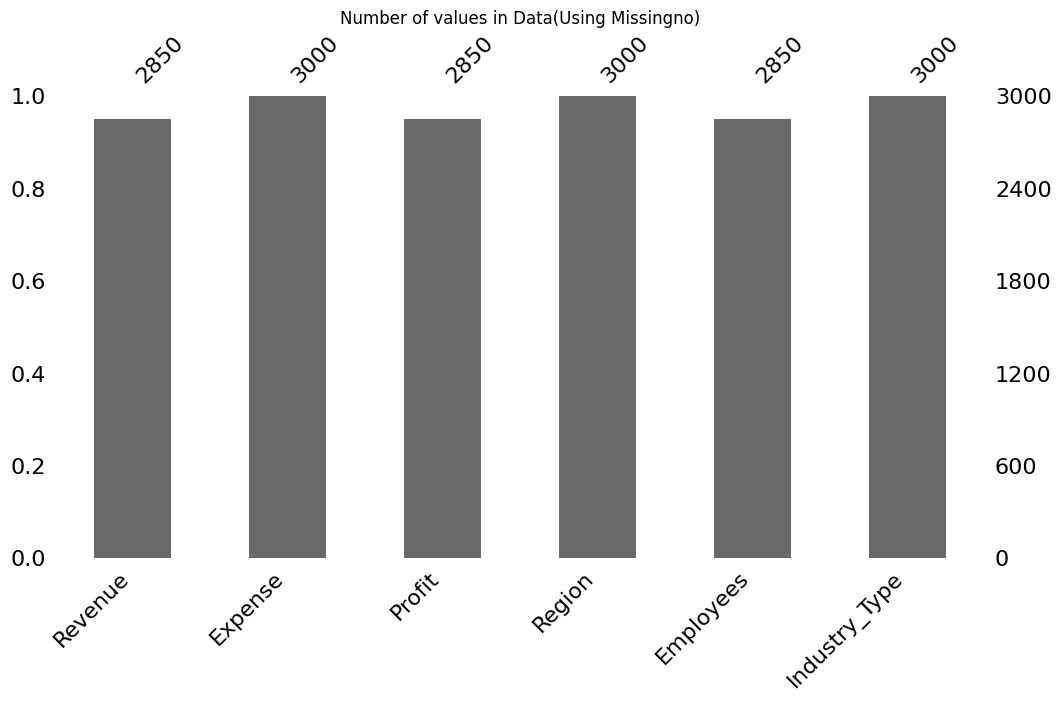

In [ ]:

import missingno as msno

msno.bar(df,figsize=(12, 6))
plt.title("Number of values in Data(Using Missingno)")
plt.show()

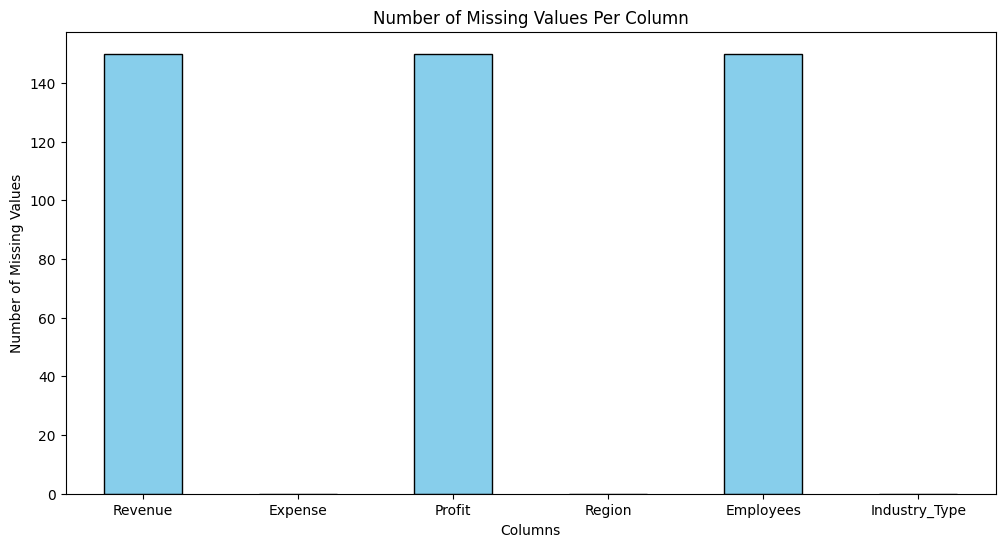

In [ ]:
missing_counts = df.isnull().sum()

# Plot the missing values as a bar chart
plt.figure(figsize=(12, 6))
missing_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Missing Values Per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#df['Industry_Type'].unique()
#df[0:].head(30)

# grouped_medians = round(df.groupby(["Industry_Type", "Region"])["Employees"].median())
# print(grouped_medians)

In [ ]:
import numpy as np
group_median = df.groupby(["Industry_Type", "Region"])["Revenue"].transform("median")
df["Revenue"] = df["Revenue"].fillna(group_median)

df.loc[pd.isna(df["Profit"]), "Profit"] = df["Revenue"] - df["Expense"]

group_median = round(df.groupby(["Industry_Type", "Region"])["Employees"].transform("median"))
df["Employees"] = df["Employees"].fillna(group_median)

#df["Employees"][:20]

##1.3: Check for outliers.

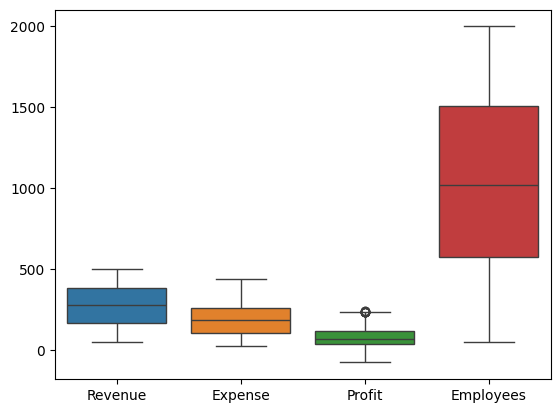

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df[['Revenue','Expense','Profit','Employees']])
plt.show()

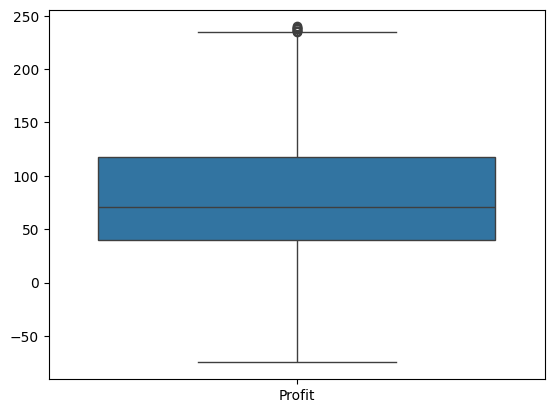

In [ ]:
sns.boxplot(df[['Profit']])
plt.show()

In [ ]:
q1=df['Profit'].quantile(0.25)
q3=df['Profit'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
#outliers= df[df['Profit']<lower_bound]
outliers= df[df['Profit']>upper_bound]
outliers

,Revenue,Expense,Profit,Region,Employees,Industry_Type
313,483.191787,243.212398,239.979388,South,591.0,Bakery
1196,488.070036,249.050356,239.019680,North,700.0,Dairy
1209,498.706025,260.728879,237.977146,South,1380.0,Snacks
1756,481.809490,242.814772,238.994718,West,864.0,Dairy
2027,491.583691,256.179340,235.404350,East,347.0,Beverages
2638,477.847718,242.268452,235.579267,West,902.0,Snacks
2646,480.559917,245.394724,235.165193,North,1307.0,Beverages
2843,477.917868,242.145987,235.771881,West,924.0,Dairy
2862,477.706627,240.279390,237.427237,East,1970.0,Dairy
2985,485.165874,245.302683,239.863191,East,704.0,Snacks


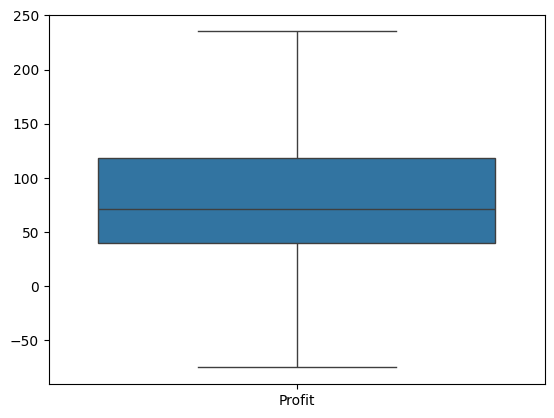

In [ ]:
q1=df['Profit'].quantile(0.25)
q3=df['Profit'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['Profit'] = df['Profit'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df[['Profit']])
plt.show()

#2. Exploratory Data Analysis (EDA)

##2.1: Univariate Analysis


Text(0.5, 1.0, 'Histogram of Profit')

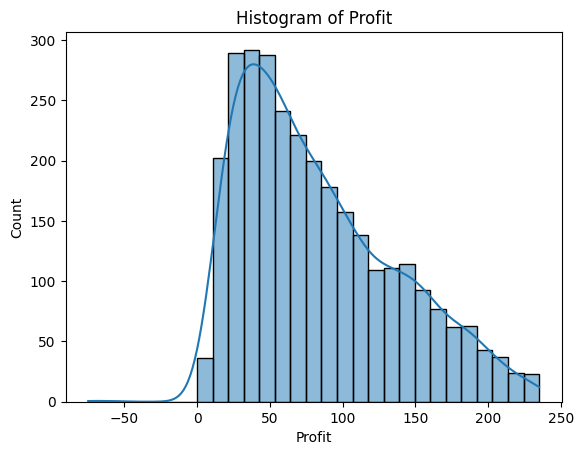

In [ ]:
sns.histplot(df['Profit'], kde=True)
plt.title("Histogram of Profit")

Text(0.5, 1.0, 'Histogram of Revenue')

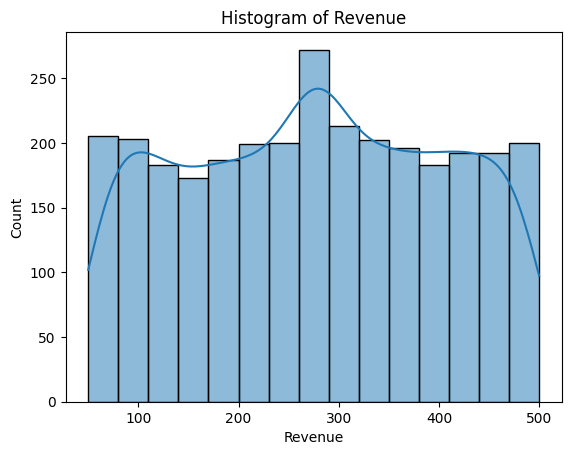

In [ ]:
sns.histplot(df['Revenue'], kde=True)
plt.title("Histogram of Revenue")

Text(0.5, 1.0, 'Histogram of Expense')

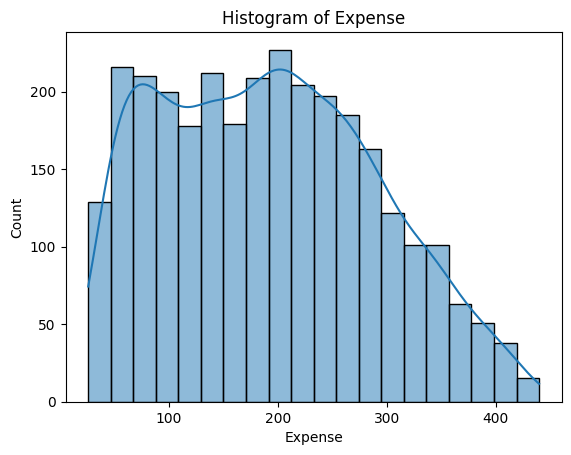

In [ ]:
sns.histplot(df['Expense'], kde=True)
plt.title("Histogram of Expense")

Text(0.5, 1.0, 'Histogram of Employees')

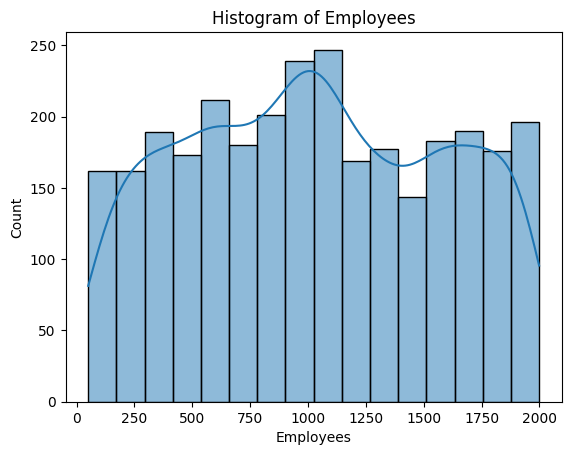

In [ ]:
sns.histplot(df['Employees'], kde=True)
plt.title("Histogram of Employees")

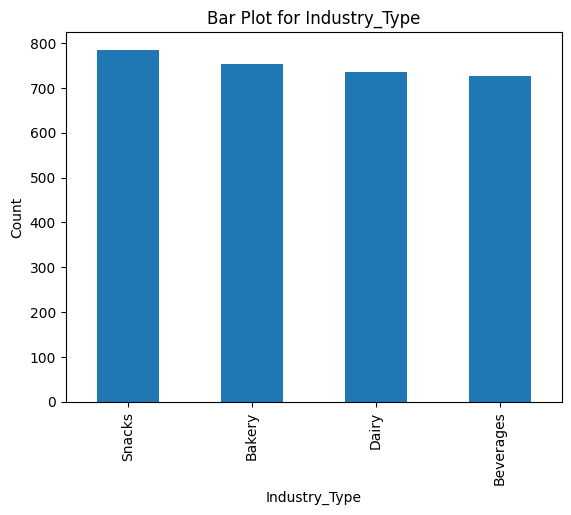

In [ ]:
df["Industry_Type"].value_counts().plot(kind="bar")

# Customize the plot
plt.title("Bar Plot for Industry_Type")
plt.xlabel("Industry_Type")
plt.ylabel("Count")
plt.show()


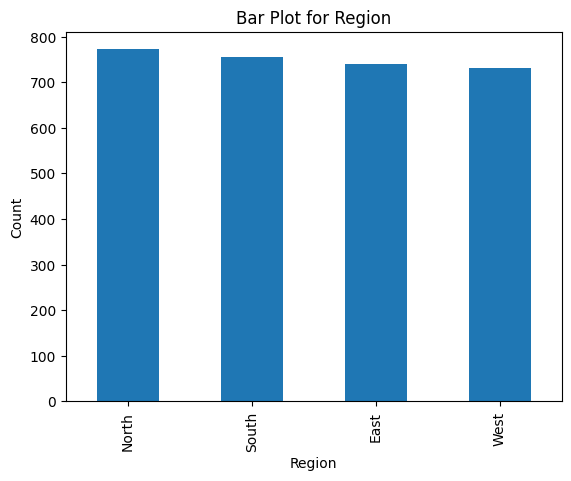

In [ ]:
df["Region"].value_counts().plot(kind="bar")

# Customize the plot
plt.title("Bar Plot for Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


##2.2: Bivariate and Multivariate Analysis.

Text(0.5, 1.0, 'Correlation Heatmap')

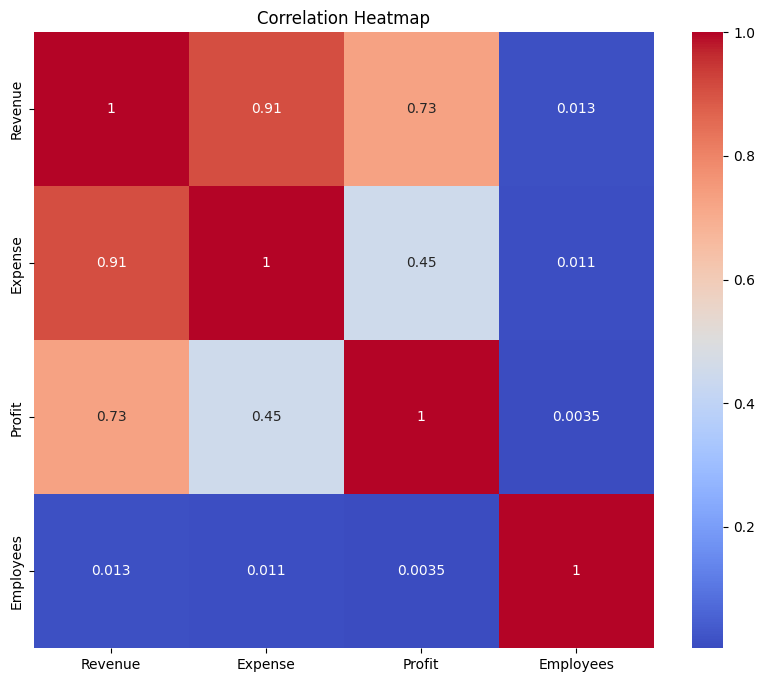

In [ ]:
numerical_df = df.select_dtypes(include=["number"])
corr=numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

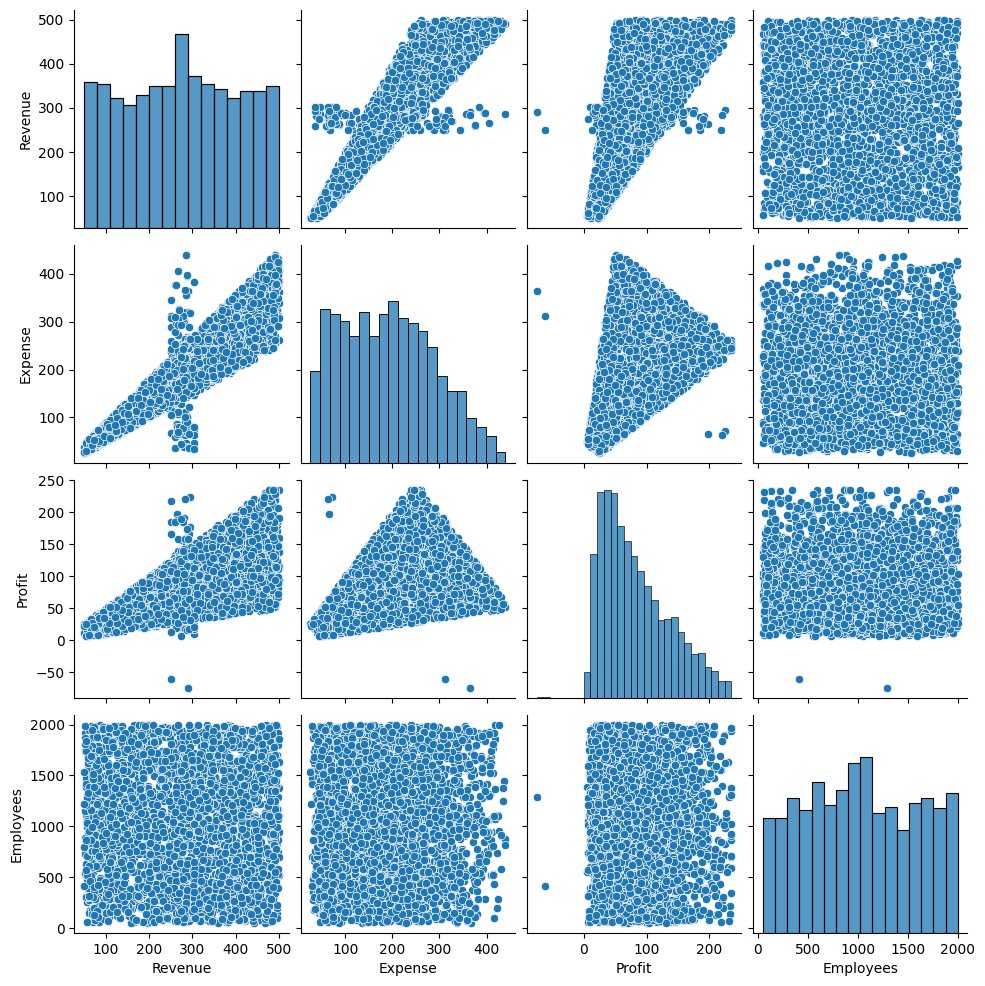

In [ ]:
sns.pairplot(df)

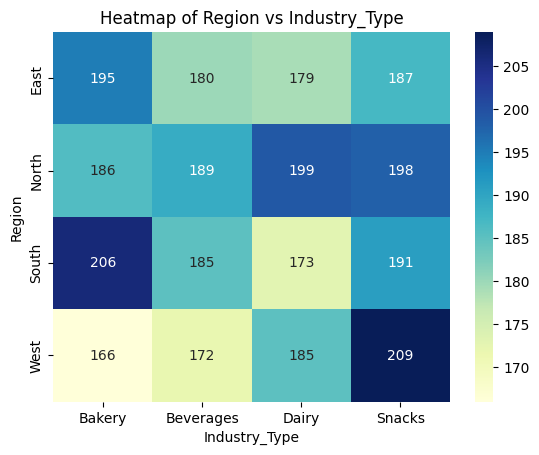

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab
crosstab = pd.crosstab(df["Region"], df["Industry_Type"])


# Plot heatmap
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")

# Customize the plot
plt.title("Heatmap of Region vs Industry_Type")
plt.xlabel("Industry_Type")
plt.ylabel("Region")
plt.show()


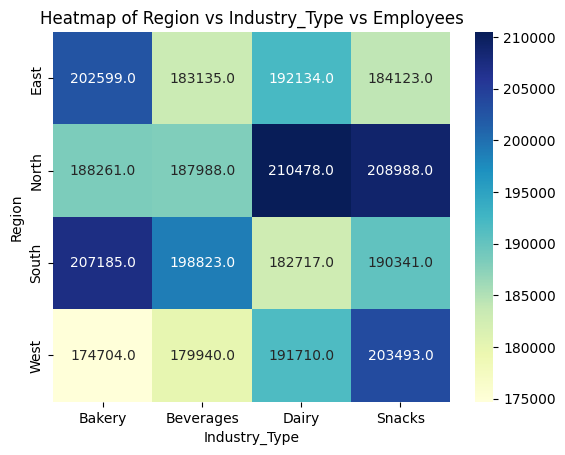

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab
crosstab = pd.crosstab(df["Region"], df["Industry_Type"])
group_sum = df.pivot_table(values="Employees", index="Region", columns="Industry_Type", aggfunc="sum")
# Plot heatmap
sns.heatmap(group_sum, annot=True, cmap="YlGnBu", fmt="")

# Customize the plot
plt.title("Heatmap of Region vs Industry_Type vs Employees")
plt.xlabel("Industry_Type")
plt.ylabel("Region")
plt.show()


##Derive insights from EDA.

**Summarizing the findings from EDA:**
1. From the histogram of the Profit column, we can say that its distribution is right skewed/positively skewed. Representing most of the values are in the lower profit range.
2. The histograms of the remaining numerical columns depicting: Revenue and Employees columns mostly followed a normal distribution - meaning the data of those columns are mostly centered around the mean. On the other hand, the data distribution in the Expense column is slightly right/positively skewed and less follow the normal distribution than in the Revenue and Employees columns.
3. The barplots of the categorical columns show that the snack type of industry is most represented in the dataset and most industries are in the North side of the region.
4. The correlation heatmap and pairplots are illustrating that Expense and Revenue columns are highly correlated (>0.9) i.e. when the expenses increase, revenue is generated more. Also, Profit is slightly correlated to Revenue.
5. From the heatmap of Region vs Industry_Type, we can see that, most of the Snacks, Dairy, Bevarages and Bakery industries are in the West, Northn North and South regions, respectively and the least of them are in the East, South, West, West Regions, respectively. Following the same way, we can also find the highest and lowest total number of employees per industry and region-wise from the heatmap of the Region vs Industry_Type vs Employees.

#3. ANOVA Analysis

##3.1: Define the groups.


**Independent variable is Industry_Type & Dependent variable is Revenue**

##3.2: Perform ANOVA.


*   **Null Hypothesis $H_0$**: There is no significant difference in Revenues across Industry_Types.
*   **Alternative Hypothesis $H_a$:**There is a significant difference in Revenues across Industry_Types.

In [ ]:
from scipy.stats import f_oneway
# Group sensor readings by shifts
sensor_readings = [
    df[df['Industry_Type'] == Industry_Type]['Revenue'] for
    Industry_Type in df['Industry_Type'].unique()
]

anova_result = f_oneway(*sensor_readings)
print(anova_result)
if anova_result.pvalue < 0.05:
    print("\nThere is a significant difference in Revenues across Industry_Types.Null hypothesis is rejected.")
else:
    print("\nThere is no significant difference in Revenues across Industry_Types. Null hypothesis is accepted.")

F_onewayResult(statistic=0.5766608854924381, pvalue=0.6303352193620642)

There is no significant difference in Revenues across Industry_Types. Null hypothesis is accepted.


**F-statistic = 0.576:** The value of the F-statistic is indicating that variance between groups is much smaller compared to the variance within groups.

**P-value=0.630:** P-value(0.630) is greater than 0.05. So, there is no significant difference in Revenues across different types of Industries.

##3.3: Document the results.

##Null Hypothesis $H_0$ is accepted.

#4. Linear Regression and Hypothesis Testing

##4.1: Defining target (Y) and feature (X) variables.

In [ ]:
import statsmodels.api as sm
X = df[["Expense"]] ##Feature X
y = df["Revenue"] ##Target Y

X_constants = sm.add_constant(X)

##4.2: Build the regression model.

In [ ]:
model_sm = sm.OLS(y, X_constants).fit()

model_summary = model_sm.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 1.421e+04
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:09:26   Log-Likelihood:                -16195.
No. Observations:                3000   AIC:                         3.239e+04
Df Residuals:                    2998   BIC:                         3.241e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1152      2.148     21.937      0.0

##**R-squared (0.826)** indicates that 82.6% of the variance in revenue is explained by the model. This strongly indicates that the model is properly fitted.

##**Coefficients:**

##**Intercept (47.1152)** suggests that when all predictors are zero, the revenue is 47.1152.

##**Expense (1.1891)** indicates that for one unit increase of expense, the revenue increases by 1.1891.


##**P-values** of all the indpendent variable indicate that all of them are statistically significant (p < 0.05), meaning they have a significant impact on revenue.

##4.3: Perform hypothesis testing.



*   **Null Hypothesis $H_0$**: Expense has no effect on Revenue
*   **Alternative Hypothesis $H_a$**: Expense has significant effect on Revenue



In [ ]:
p_value = model_sm.pvalues["Expense"]

if p_value < 0.05:
  print("Null Hypothesis is rejected. Expense variable is statistically significant and has significant impact on Revenue.")
else:
  print("Fail to reject the null hypothesis.")

Null Hypothesis is rejected. Expense variable is statistically significant and has significant impact on Revenue.


##**Null Hypothesis is rejected. Expense variable is statistically significant and has significant impact on Revenue.**

## 4.4: Interpret the results.

##**The dependent variable 'Revenue' is significantly influenced by the independent variable 'Expense'. The standard error of the 'Expense' is 0.010 which is a very small value indicating that the model will precisely estimate the 'Revenue' for any given value of 'Expense'. Based on the R-squared of the model, we can say that the independent variable explained the dependent variable well.**

Text(0.5, 1.0, 'Revenue vs Expense')

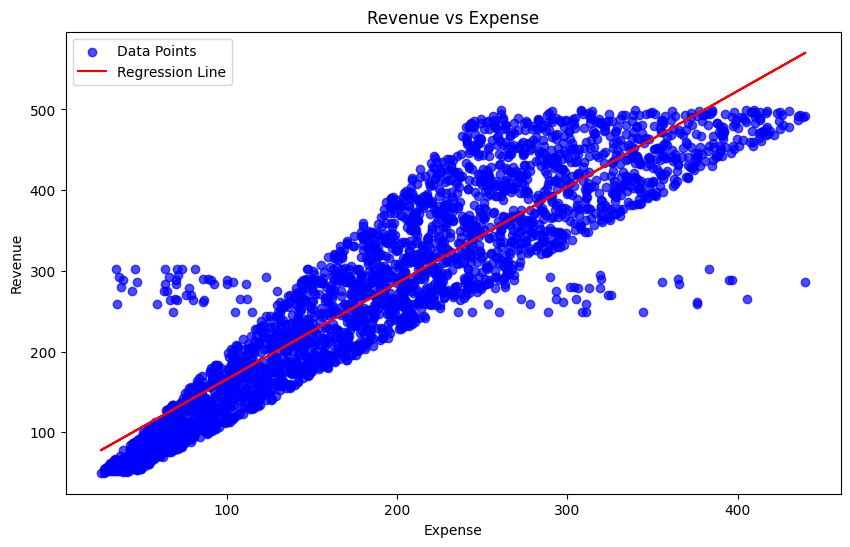

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X["Expense"], y,color = 'blue', alpha=0.7,label = "Data Points")
plt.plot(X, model_sm.predict(), color = 'red', label = 'Regression Line')
plt.legend()
plt.xlabel("Expense")
plt.ylabel("Revenue")
plt.title("Revenue vs Expense")